In [13]:
# Import Packages
import math
import quandl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from quantbt import Portfolio, csvDataHandler
sns.set_style('ticks')
print('Modules Loaded Successfully!')

Modules Loaded Successfully!


In [14]:
# Initialize some data sets from quandl
sp500 = quandl.get("CHRIS/CME_ES1", authtoken="KsJyQ1H1vTxUbBN3ZGf9")['Last']
gilts = quandl.get("CHRIS/LIFFE_R1", authtoken="KsJyQ1H1vTxUbBN3ZGf9")['Settle']

prices_df = pd.concat([sp500,gilts],axis=1).dropna()
prices_df.columns = ['SP_500','Gilts']

dates = prices_df.index
prices = prices_df.to_dict(orient='index')

# Alternatively get data sets from a local CSV
# datasources = csvDataHandler(datasources={'Prices':'Prices_Example.csv'})
# [dates,prices_df] = datasources.getDataFromSource('Prices')

print('Data Loaded')

Data Loaded


In [15]:
# Initialize Portfolio object
samplePortfolio = Portfolio({},100.0,name='Sample Portfolio',datadump=False)
samplePortfolio.setFixedTransactionCosts({asset:0.0001 for asset in prices_df.columns})
samplePortfolio.setAnnualManagementFee(0.005)

# Define Rebalance Trigger
rebalanceTrigger = pd.offsets.BMonthEnd()

# Static Weights For Rebalance
targetWeights = {'SP_500':0.5,'Gilts':0.5}

print('Portfolios Initalized!')

Portfolios Initalized!


In [27]:
print(f'Beginning backtest from {dates[0]} to {dates[-1]}')
for i,date in enumerate(dates):
    if date == rebalanceTrigger.rollforward(date):
        samplePortfolio.rebalance(targetWeights,prices[date],date)
    samplePortfolio.signOff(date,prices[date])

print('Backtest Complete!')

Beginning backtest from 2007-12-28 00:00:00 to 2020-01-17 00:00:00
Backtest Complete!


,Ann. Returns,Ann. Volatility,Ann. Sharpe Ratio,Maximum Drawdown
2020-01-17,0.041757,0.095109,0.439042,-0.27895


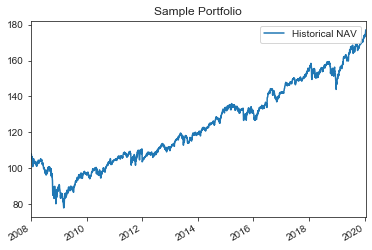

In [32]:
# Examine Portfolio Performance
samplePortfolio.getHistoricalNAV().plot(title=f'{samplePortfolio.getPortfolioName()}')
samplePortfolio.getPerformanceStatistics(historical=False)